# A.Thông tin chung

### Your information:
- Fullname: Doan Minh Hieu
- Date of birth: 18-08-1993
- Place of birth: Song Hinh - Phu Yen
- Email: dmhieu93@gmail.com
- Mobile phone: 097 113 8967

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

# B. Data exploration - khám phá dữ liệu
### Công việc cần làm:
  - Đọc/ xem thông tin cơ bản dữ liệu.
  - Xác định input/ output
  - Kiểu dữ liệu của các biến.
  - Có biến nào bị Mising, dữ liệu trùng, kí tự đặc biệt?
  - Xác định biến nào là dữ liệu số (định lượng) và object (định tính)
  - Trong các dữ liệu số biến nào là biến phân loại và biến nào là biến liên tục.
  - Lưu ý các biến object cũng có thể là dữ liệu số nhưng bị lẫn các kí tự đặc biệt.

### Load Data From CSV File  

In [3]:
# Read CSV file: loan_train.csv
# file_path = '/content/drive/MyDrive/Colab Notebooks/LDS5 - TienXuLy/Cuoi khoa/LDS5_262_Project_1_FullName/loan_train.csv'
df_loan = pd.read_csv("loan_train.csv")
df_loan.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df_loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df_loan.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [5]:
df_loan.shape

(346, 8)

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [7]:
df_loan.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


### Convert 'due_date', 'effective_date' to date time object 

In [8]:
# code here
lst_datatime = ['due_date', 'effective_date']
for i in lst_datatime:
  df_loan[i] = pd.to_datetime(df_loan[i])

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


In [9]:
df_loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [10]:
# Kiểm tra xem có biến nào bị giá trị null không
df_loan.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### Xác định kiểu dữ liệu

In [11]:
# Xác định biến định lượng hay định tính
objs = [f for f in df_loan.columns if df_loan.dtypes[f] == "object"]
nums = [f for f in df_loan.columns if df_loan.dtypes[f] != "object"]

# Kiểm tra xem trong các biến định tính có phải là biến định lượng nhưng bị lẫn các kí tự đặc biệt hay ko?
i = 1
for obj in objs:
  print(i,"/ ",obj," ",len(df_loan[obj].unique()),": ",df_loan[obj].unique() if len(df_loan[obj].unique())<=5 else "")    
  i+=1

1 /  loan_status   2 :  ['PAIDOFF' 'COLLECTION']
2 /  education   4 :  ['High School or Below' 'Bechalor' 'college' 'Master or Above']
3 /  Gender   2 :  ['male' 'female']


In [12]:
# xác định biến phân loại và liên tục trong các biến định lượng
i = 1
for num in nums:
  print(i,"/ ",num," ",len(df_loan[num].unique())," : ",df_loan[num].unique() if len(df_loan[num].unique())<=5 else "")

1 /  Principal   5  :  [1000  800  300  900  500]
1 /  terms   3  :  [30 15  7]
1 /  effective_date   7  :  
1 /  due_date   23  :  
1 /  age   32  :  


### Nhận xét sơ bộ  
  - Dữ liệu có 8 cột, 346 dòng
  - Output: loan_status
  - Input: != loan_status
  - Các kiểu dữ liệu: int64, object, datetime64[ns]
  - Có 2 biến phân loại kiểu số là ["Principal","terms"]
  - Có 3 biến phân loại định tính là ["loan_status","education","Gender"]
  - 2 biến dạng datetime là ["efective_date","due_date"]
  - Không có biến nào có dữ liệu nào bị null nên chưa cần xử lý.
  => Ta sẽ kiểm tra outlier để xem có xử lý hay ko sau?
  
### Công việc tiếp theo
  1. Phân tích đơn biến
    - conti:
      - Xem xu hướng trung tâm và phân tán của dữ liệu(describe, median, mode, iqr, knew, kurt, var, std)
      - Sử dụng hist/distplot, kdeplot, boxplot để quan sát dữ liệu
      - Xem boxplot để loại outlier > 1.5*iqr
      - Lưu ý kiểm tra kỹ outlier và xem tỷ lệ outlier trước khi loại.
    - categ:
      - Đếm số lg ptu các nhóm
      - Sử dụng barplot để quan sát dữ liệu
  2. Phân tích 2 biến:
    - conti vs conti:
        - Sử dụng scatter hoặc pairplot để quan sát dữ liêu
        - Xem hệ số tương quan đưa ra nhận xét
    - categ vs categ:
        - count() các giá trị trong nhóm bằng crosstab
        - Xem dữ liệu bằng biểu đồ cột chồng hoặc pieplot.
        - Sử dụng kiểm định Chi2 để kiểm tra cặp biến phân loại đang xét là phụ thuộc hay độc lập(có ảnh hưởng tới nhau hay không)
    - conti vs categ:
        - count() các giá trị trong nhóm phân loại bằng crosstab.
        - Sử dụng kiểm định ANOVA

# C. Phân tích các biến - mô hình hóa dữ liệu

## Phân tích đơn biến

### Biến phân loại:
  - 2 biến phân loại kiểu số là ["Principal","terms"]
  - 3 biến phân loại định tính là ["loan_status","education","Gender"]

In [13]:
lst_categ_num = ["Principal","terms"]
for i in lst_categ_num:
  print("Dư liệu của biến :",i)
  print(df_loan[i].value_counts())
  print("\n")

Dư liệu của biến : Principal
1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64


Dư liệu của biến : terms
30    184
15    148
7      14
Name: terms, dtype: int64




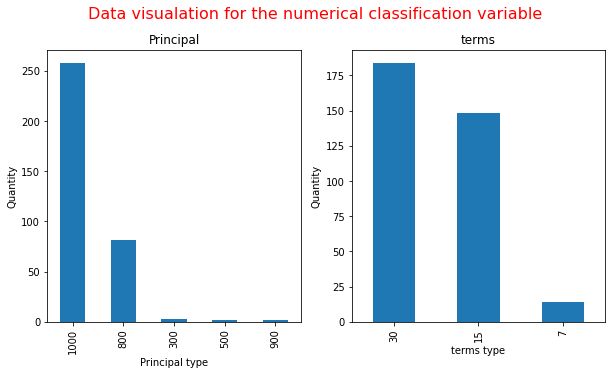

In [14]:
# Mô hình hóa dữ liệu
plt.figure(figsize=(10,5))
k = 1
for i in lst_categ_num:
  plt.subplot(1,2,k)
  plt.suptitle("Data visualation for the numerical classification variable ",fontsize=16,y=1,c="red")
  df_loan[i].value_counts().plot(kind="bar")
  plt.title(i)
  plt.xlabel(i+" type")
  plt.ylabel("Quantity")
  k+=1

plt.show()

In [15]:
lst_categ_not_num = ["loan_status","education","Gender"]
for i in lst_categ_not_num:
  print("Dữ liệu của biến: ",i)
  print(df_loan[i].value_counts())
  print("\n")


Dữ liệu của biến:  loan_status
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


Dữ liệu của biến:  education
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


Dữ liệu của biến:  Gender
male      294
female     52
Name: Gender, dtype: int64




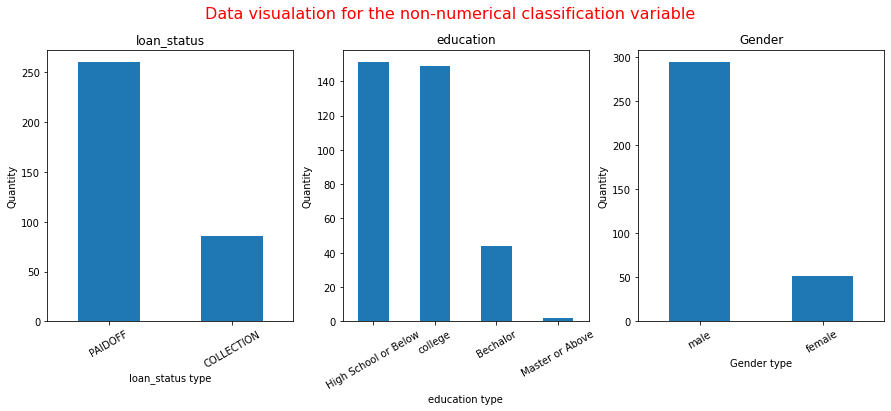

In [16]:
# Mô hình hóa dữ liệu
plt.figure(figsize=(15,5))
k = 1
for i in lst_categ_not_num:
  plt.subplot(1,3,k)
  plt.suptitle("Data visualation for the non-numerical classification variable ",fontsize=16,y=1,c="red")
  df_loan[i].value_counts().plot(kind="bar")
  plt.title(i)
  plt.xlabel(i+" type")
  plt.ylabel("Quantity")
  plt.xticks(rotation=30)
  k+=1

plt.show()

### Biến liên tục:
  - Có 1 biến liên tục là Age

In [17]:
# các thông số cơ bản
desc = df_loan['age'].describe()
desc

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [18]:
import scipy.stats as ss
median = df_loan["age"].median()
mode = df_loan["age"].mode()
Q1 = np.percentile(df_loan["age"],25)
Q3 = np.percentile(df_loan["age"],75)
iqr = ss.iqr(df_loan["age"])
std = df_loan["age"].std()
var = df_loan["age"].var()
skew = df_loan["age"].skew()
kurt = ss.kurtosis(df_loan["age"])
lst_spec = [median,mode,Q1,Q3,iqr,std,var,skew,kurt]
lst_label = ["Trung vị: ","Mode: ","Q1","Q3","iqr: ","Độ lệch chuẩn: ","Phương sai: ","Độ lệch: ","Độ nhọn: "]
print("các thông số cơ bản của biến 'age'\n")
for i in range(len(lst_spec)):
  print("%s : %.2f" %(lst_label[i],lst_spec[i]))

các thông số cơ bản của biến 'age'

Trung vị:  : 30.00
Mode:  : 26.00
Q1 : 27.00
Q3 : 35.00
iqr:  : 8.00
Độ lệch chuẩn:  : 6.04
Phương sai:  : 36.47
Độ lệch:  : 0.70
Độ nhọn:  : 0.46


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


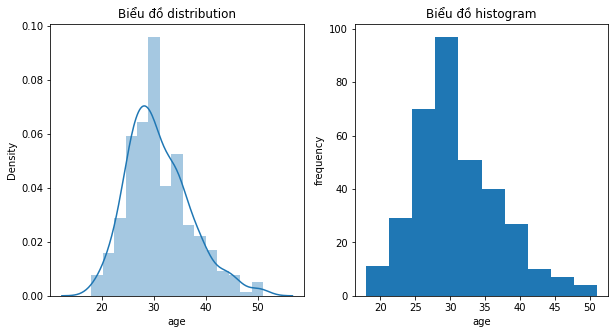

In [19]:
# Phân phối gần như là phân phối chuẩn ns trung bình ~ trung vị, độ lệch và độ nhon ~ 0
# Mô hình hóa dữ liệu
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Biểu đồ distribution")
sns.distplot(df_loan["age"])
plt.subplot(122)
plt.hist(df_loan["age"])
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Biểu đồ histogram")
plt.show()

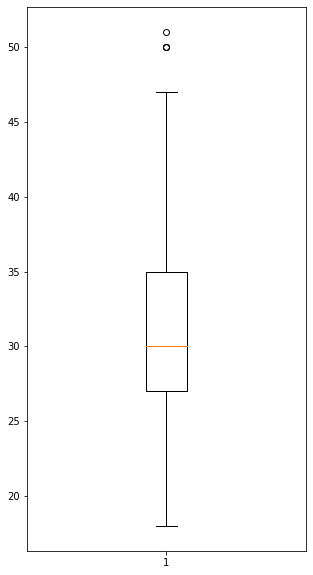

In [20]:
# boxplot
plt.figure(figsize=(5,10))
plt.boxplot(df_loan["age"])
plt.show()

In [21]:
# Theo boxplot ta thấy có outlier 
# kiểm tra xem có bao nhiêu outlier và các biến outlier có hợp lệ ko?
outlier_num = df_loan["age"][df_loan["age"]>(Q3+1.5*iqr)].shape
print("Có %i outlier " %outlier_num[0])
df_loan["age"][df_loan["age"]>(Q3+1.5*iqr)]

Có 4 outlier 


41     50
184    50
223    51
293    50
Name: age, dtype: int64

###### => Dữ liệu hợp lệ nên ta không loại outlier

## Phân tích 2 biến
  - Output: biến phân loại loan_status
  - Input:
    - 4 biến phân loại: ["Principal","terms","education","Gender"]
    - 1 biến liên tục: age

### Phân tích giữa các biến phân loại với nhau

In [22]:
lst_categ = ["Principal","terms","loan_status","education","Gender"]
k = 0
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_loan[lst_categ[m]],df_loan[lst_categ[n]])
    print("+ Crosstab của 2 biến %s và %s" %(lst_categ[m],lst_categ[n]),"\n",table,"\n")

+ Crosstab của 2 biến Principal và terms 
 terms      7   15   30
Principal             
300         3   0    0
500         1   1    0
800         1  75    5
900         1   1    0
1000        8  71  179 

+ Crosstab của 2 biến Principal và loan_status 
 loan_status  COLLECTION  PAIDOFF
Principal                       
300                   0        3
500                   0        2
800                  18       63
900                   0        2
1000                 68      190 

+ Crosstab của 2 biến Principal và education 
 education  Bechalor  High School or Below  Master or Above  college
Principal                                                          
300               0                     2                0        1
500               0                     1                0        1
800              11                    32                1       37
900               0                     0                0        2
1000             33                   116                

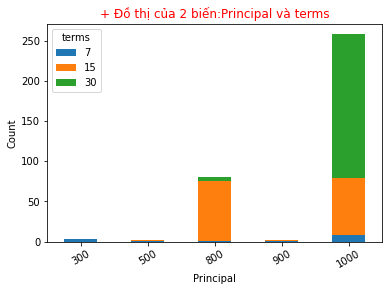

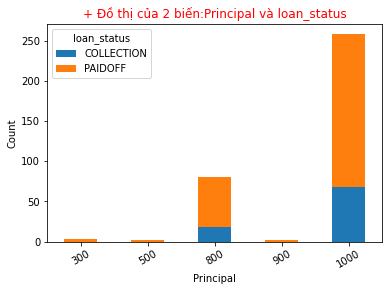

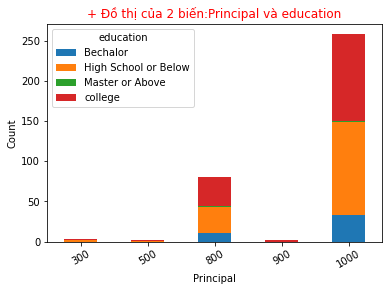

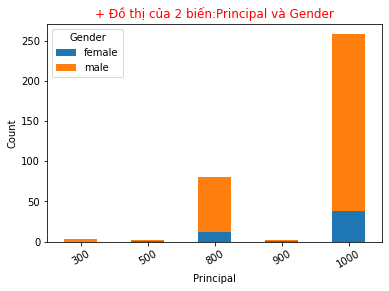

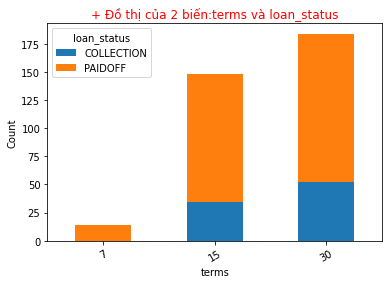

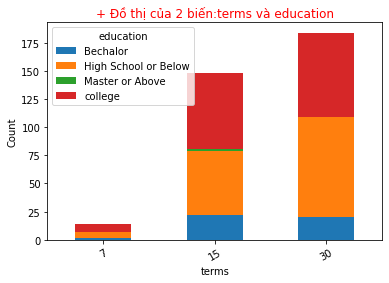

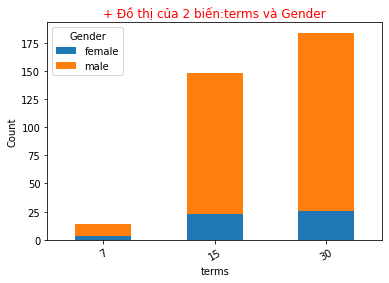

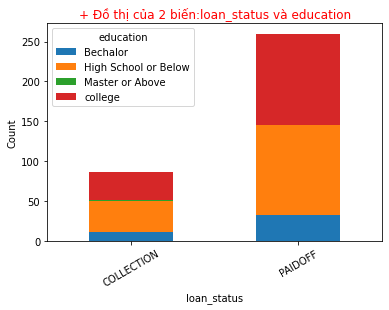

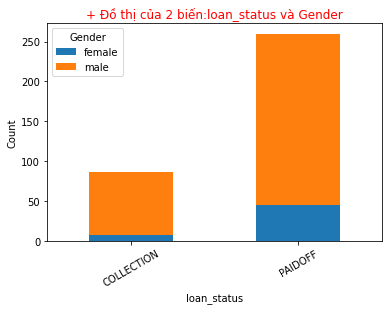

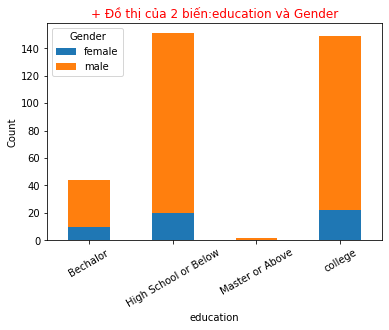

In [23]:
# Mô hình hóa dữ liệu các biến phân loại
k = 0
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_loan[lst_categ[m]],df_loan[lst_categ[n]])
    table.plot(kind="bar",stacked=True)
    plt.title("+ Đồ thị của 2 biến:" + lst_categ[m] + " và " + lst_categ[n],c="red")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
plt.show()


In [24]:
# Kiểm định Chi2 cho các biến phân loại
# H0: 2 biến độc lập
from scipy.stats import chi2_contingency,chi2
k = 0
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_loan[lst_categ[m]],df_loan[lst_categ[n]])
    stat,p,dof,expected = chi2_contingency(table)
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    alpha = 1.0 - prob
    if p <= alpha:
      print("2 biến %s và %s phụ thuộc (reject H0)" %(lst_categ[m],lst_categ[n]))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")
    else:
      print("2 biến %s và %s độc lập (không reject H0)" %(lst_categ[m],lst_categ[n]))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")

2 biến Principal và terms phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

2 biến Principal và loan_status độc lập (không reject H0)
significance= 0.0500, p-value = 0.5701 

2 biến Principal và education độc lập (không reject H0)
significance= 0.0500, p-value = 0.9498 

2 biến Principal và Gender độc lập (không reject H0)
significance= 0.0500, p-value = 0.3567 

2 biến terms và loan_status phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0485 

2 biến terms và education độc lập (không reject H0)
significance= 0.0500, p-value = 0.3883 

2 biến terms và Gender độc lập (không reject H0)
significance= 0.0500, p-value = 0.7424 

2 biến loan_status và education độc lập (không reject H0)
significance= 0.0500, p-value = 0.8248 

2 biến loan_status và Gender độc lập (không reject H0)
significance= 0.0500, p-value = 0.0590 

2 biến education và Gender độc lập (không reject H0)
significance= 0.0500, p-value = 0.4268 



### Phân tích kỹ hơn các biến phân loại Input so với biến phân loại output loan_status

In [25]:
lst_categ_2 = ['Principal', 'terms','education', 'Gender']

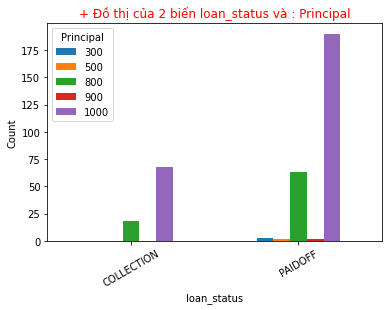

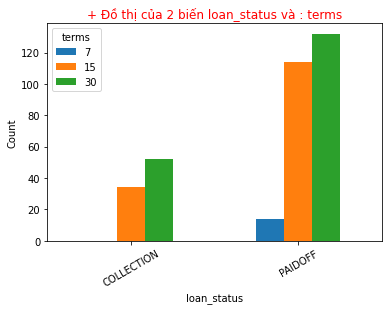

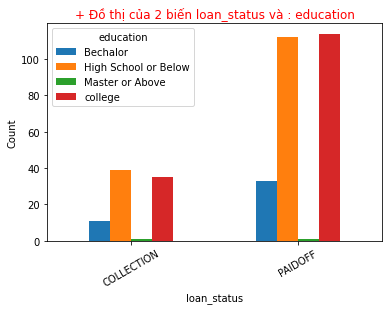

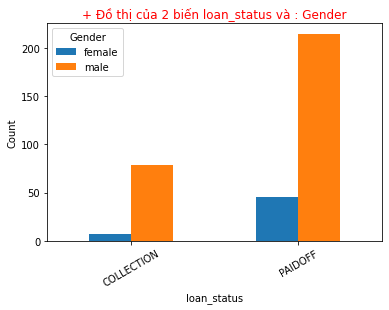

In [26]:
k = 0
for n in lst_categ_2:
    table = pd.crosstab(df_loan["loan_status"],df_loan[n])
    table.plot(kind="bar",stacked=False)
    plt.title("+ Đồ thị của 2 biến loan_status và : "+ n,c="red")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
plt.show()


In [27]:
# Kiểm định Chi2 cho các biến phân loại
# H0: 2 biến độc lập
from scipy.stats import chi2_contingency,chi2
for n in lst_categ_2:
    table = pd.crosstab(df_loan["loan_status"],df_loan[n])
    stat,p,dof,expected = chi2_contingency(table)
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    alpha = 1.0 - prob
    if p <= alpha:
      print("2 biến %s và %s phụ thuộc (reject H0)" %("loan_status",n))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")
    else:
      print("2 biến %s và %s độc lập (không reject H0)" %("loan_status",n))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")


2 biến loan_status và Principal độc lập (không reject H0)
significance= 0.0500, p-value = 0.5701 

2 biến loan_status và terms phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0485 

2 biến loan_status và education độc lập (không reject H0)
significance= 0.0500, p-value = 0.8248 

2 biến loan_status và Gender độc lập (không reject H0)
significance= 0.0500, p-value = 0.0590 



###  Nhận xét
  - Dựa trên kiểm định Chi2 giữa biến phân loại input và output loan_status ta thấy có biến term là phụ thuộc với biến loan_status

### Biến phân loại vs biến liên tục

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


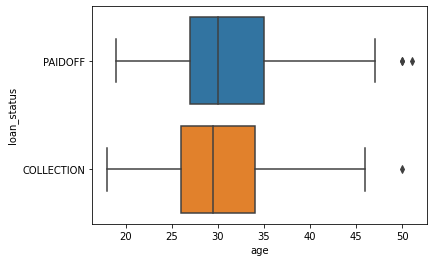

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = df_loan[["age","loan_status"]]
sns.boxplot(data=df,y="loan_status",x="age")
plt.show()
# Phân tích giữa biến "age" và biến output loan_status
model = ols('age ~ C(loan_status)',data=df).fit()
#print(model.summary())
anova_table = sm.stats.anova_lm(model)
# anova_table
# model


In [29]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,9.502088,9.502088,0.259954,0.610479
Residual,344.0,12574.223345,36.552975,NaN,NaN


P-value > 0.05 nên độ tuổi không ảnh hưởng đáng kể đến output loan_status

### Ta thử xem dữ liệu phân bổ giữa các biến tác động lên tình trạng vay theo giới tính

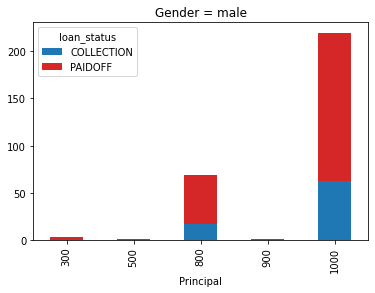

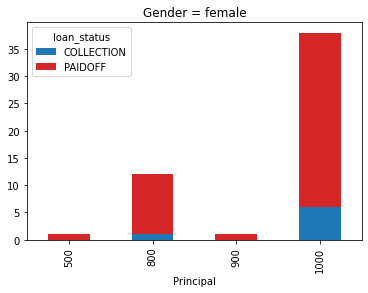

In [30]:
# Principal_Male_Female
import seaborn as sns
lst = ['male','female']
for i in lst:
  sns.set_palette(palette=["C0","C3"])
  df_loan_m_f = df_loan.loc[df_loan['Gender']==i]
  Principal_loan_m_f = pd.crosstab(df_loan_m_f['Principal'],df_loan_m_f['loan_status'])
  Principal_loan_m_f.plot(kind='bar',stacked=True)
  plt.title('Gender = %s' %i)
plt.show()


In [31]:
Principal_loan_m_f.head()

loan_status,COLLECTION,PAIDOFF
Principal,,
500,0,1
800,1,11
900,0,1
1000,6,32


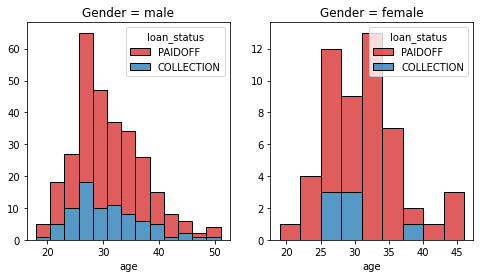

In [32]:
# Age_Male_Female
plt.figure(figsize=(8,4))
plt.subplot(121)
df_loan_male = df_loan.loc[df_loan['Gender']=='male']
sns.histplot(df_loan_male,x='age',hue='loan_status',multiple='stack',palette=["C3", "C0"])
plt.title("Gender = male")
plt.ylabel("")

plt.subplot(122)
df_loan_female = df_loan.loc[df_loan['Gender']=='female']
sns.histplot(df_loan_female,x='age',hue='loan_status',multiple='stack',palette=["C3", "C0"])
plt.title("Gender = female")
plt.ylabel("")
plt.show()

### Nhận xét:
  - Với các biến phân loại ta thấy chủ yếu là các khoản vay có principal là 1000(258) và 800(81) với điều khoản vay term là 30 ngày(184) và 15 ngày(148).
  - Các khoản vay hầu như đã trả hết 260 PAIDOFF so với 86 COLLECTION
  - Nhóm khảo sát chủ yếu là nam chiếm 294 so với 52 nữ
  - Trình độ học vấn chủ yếu là cao đẳng-collecge(149) và highscool(151) trên tổng số 346 mẫu.
  - Dựa trên kiểm định 2 biến độc lập ta thấy có mối liên hệ giữa cặp biến "Principal - term" và cặp biến "term - loan_status" đây là dữ kiện để ta chọn biến phù hợp để dự đoán mô hình.
  - Với biến liên tục là độ tuổi sau khi phân tích ta thấy biến hợp lệ.
### Công việc tiếp theo:
  - Dựa trên kiểm định lựa chọn các biến phù hợp để dự đoán.
  - Ta thấy có đâu đó sự khác biệt giữa những cá nhân vay tiền vào đầu tuần và cuối tuần => xử lý thêm dữ liệu week để kiểm tra điều này.
  - Tiến hành dự đoán và kiểm tra đánh giá mô hình.
  - Sử dụng các phương thức chuẩn hóa dữ liệu để nâng cao độ chính xác mô hình.

# D.Tiền xử lý - Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

### Xử lý ngày trong tuần và xem dữ liệu

In [33]:
# code here
df_loan['dayofweek'] = df_loan['effective_date'].dt.dayofweek
df_loan.head()
df_loan.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0
345,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male,0


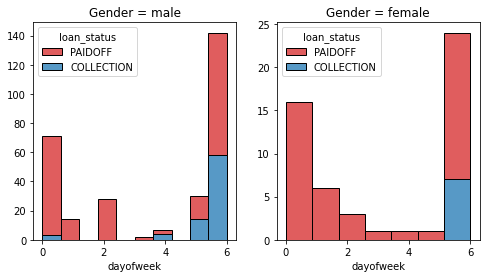

In [34]:
# code here
plt.figure(figsize=(8,4))
plt.subplot(121)
df_loan_male = df_loan.loc[df_loan['Gender']=='male']
sns.histplot(df_loan_male,x='dayofweek',hue='loan_status',multiple='stack',palette=["C3", "C0"])
plt.title('Gender = male')
plt.ylabel("")

plt.subplot(122)
df_loan_female = df_loan.loc[df_loan['Gender']=='female']
sns.histplot(df_loan_female,x='dayofweek',hue='loan_status',multiple='stack',palette=["C3", "C0"])
plt.title('Gender = female')
plt.ylabel("")
plt.show()

Tạo Threshold để phân biệt ngày cuối tuần và ngày trong tuần

In [35]:
# code here
scaler = preprocessing.Binarizer(threshold=3)
X = np.array(df_loan['dayofweek']).reshape(-1,1)
df_loan['weekend'] = scaler.fit_transform(X)
df_loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [36]:
df_loan.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0
345,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male,0,0


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [37]:
# code here
df_loan.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Có ~86% nữ thanh toán đúng hạn và ~73% nam thanh toán đúng hạn

Chuyển biến phân loại thành số male = 1, female = 0


In [38]:
df_loan.info()
label_encoder = preprocessing.LabelEncoder()
df_loan["Gender"] = label_encoder.fit_transform(df_loan["Gender"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
 8   dayofweek       346 non-null    int64         
 9   weekend         346 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [39]:

df_loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [40]:
# code here
df_loan.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Ta thấy tỷ lệ thanh toán đúng hạn của các nhóm tri thức gần tương tự nhau ~75% , còn riêng nhóm "Master or Above" vì mẫu quá ít nên cũng chưa thể kết luận được gì

#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [41]:
# lựa chọn thuộc tính để build model
lst_feature = ['Principal','terms','age','Gender','weekend', 'education']
Feature_before = df_loan[lst_feature]
Feature_before.head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,1,0,High School or Below
1,1000,30,33,0,0,Bechalor
2,1000,15,27,1,0,college
3,1000,30,28,0,1,college
4,1000,30,29,1,1,college


In [42]:
education_one_hot = pd.get_dummies(Feature_before,prefix="S",columns=['education'])
Feature = education_one_hot.drop(columns='S_Master or Above',axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,S_Bechalor,S_High School or Below,S_college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [43]:
# X_train
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,S_Bechalor,S_High School or Below,S_college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


In [44]:
X.shape

(346, 8)

What are our lables?
- y is output, y = 'loan_status' column

In [45]:
# y_train
y = pd.get_dummies(df_loan['loan_status'],prefix="S",columns=['loan_status'],drop_first=True)

In [46]:
df_predict = pd.concat([X,y],axis=1)
df_predict.head()

,Principal,terms,age,Gender,weekend,S_Bechalor,S_High School or Below,S_college,S_PAIDOFF
0,1000,30,45,1,0,0,1,0,1
1,1000,30,33,0,0,1,0,0,1
2,1000,15,27,1,0,0,0,1,1
3,1000,30,28,0,1,0,0,1,1
4,1000,30,29,1,1,0,0,1,1


# E. Chuẩn hóa dữ liệu - Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [47]:
df_predict.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'S_Bechalor',
       'S_High School or Below', 'S_college', 'S_PAIDOFF'],
      dtype='object')

In [48]:
lst_scaler = ['Principal', 'terms', 'age']
lst_non_scaler = ['Gender', 'weekend','S_Bechalor','S_High School or Below', 'S_college']

In [49]:
# Standard_scaler
X_Standard_Scaler = X[lst_scaler]
X_Standard_Scaler = preprocessing.StandardScaler().fit(X_Standard_Scaler).transform(X_Standard_Scaler)
X_Standard_Scaler

array([[ 0.51578458,  0.92071769,  2.33152555],
       [ 0.51578458,  0.92071769,  0.34170148],
       [ 0.51578458, -0.95911111, -0.65321055],
       ...,
       [-1.31458942, -0.95911111,  1.33661351],
       [ 0.51578458,  0.92071769, -0.48739188],
       [ 0.51578458,  0.92071769, -0.81902922]])

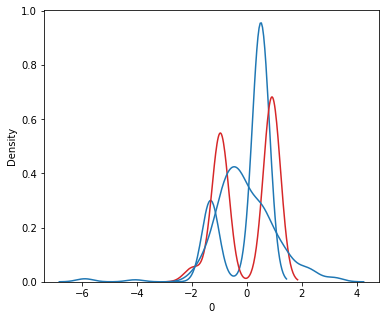

In [50]:
X_Standard_Scaler_1 = pd.DataFrame(X_Standard_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(3):
    sns.kdeplot(X_Standard_Scaler_1[i], ax=ax1)
plt.show()

In [51]:
X_Standard_Scaler_2 = pd.concat([X_Standard_Scaler_1,df_predict[lst_non_scaler]],axis=1)

In [52]:
# Robust_Scaler
X_Robust_Scaler = X[lst_scaler]
X_Robust_Scaler = preprocessing.RobustScaler().fit(X_Robust_Scaler).transform(X_Robust_Scaler)
X_Robust_Scaler

array([[ 0.   ,  0.   ,  1.875],
       [ 0.   ,  0.   ,  0.375],
       [ 0.   , -1.   , -0.375],
       ...,
       [-2.   , -1.   ,  1.125],
       [ 0.   ,  0.   , -0.25 ],
       [ 0.   ,  0.   , -0.5  ]])

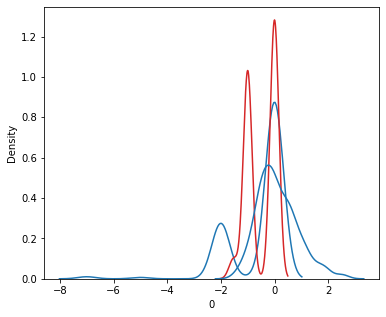

In [53]:
X_Robust_Scaler_1 = pd.DataFrame(X_Robust_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(3):
    sns.kdeplot(X_Robust_Scaler_1[i], ax=ax1)
plt.show()

In [54]:
X_Robust_Scaler_2 = pd.concat([X_Robust_Scaler_1,df_predict[lst_non_scaler]],axis=1)

In [55]:
# MinMax_Scaler
X_MinMax_Scaler = X[lst_scaler]
X_MinMax_Scaler = preprocessing.MinMaxScaler().fit(X_MinMax_Scaler).transform(X_MinMax_Scaler)
X_MinMax_Scaler

array([[1.        , 1.        , 0.81818182],
       [1.        , 1.        , 0.45454545],
       [1.        , 0.34782609, 0.27272727],
       ...,
       [0.71428571, 0.34782609, 0.63636364],
       [1.        , 1.        , 0.3030303 ],
       [1.        , 1.        , 0.24242424]])

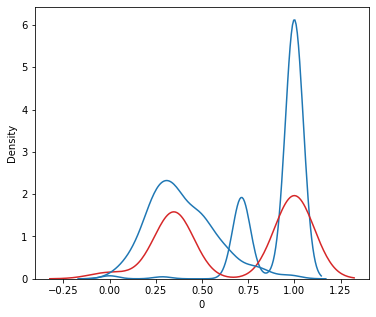

In [56]:
X_MinMax_Scaler_1 = pd.DataFrame(X_MinMax_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(3):
    sns.kdeplot(X_MinMax_Scaler_1[i], ax=ax1)
plt.show()

In [57]:
X_MinMax_Scaler_2 = pd.concat([X_MinMax_Scaler_1,df_predict[lst_non_scaler]],axis=1)

# F. Tạo mô hình dự đoán - Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Train với X_standard_scaler
loan_Logis_reg_Standard = clf.fit(X_Standard_Scaler_2,y)

# Train với X_MinMax_Scaler
loan_Logis_reg_MinMax = clf.fit(X_MinMax_Scaler_2,y)

# Train với X_Robust_Scaler
loan_Logis_reg_Robust = clf.fit(X_Robust_Scaler_2,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# G. Đánh giá model - Model Evaluation using Test set

In [59]:
from sklearn.metrics import accuracy_score
# and the others libraries...

### Load Test set for evaluation 

In [60]:
# Read CSV file: loan_test.csv
# dùng dữ liệu test để test
# loan_test_path = "/content/drive/MyDrive/Colab Notebooks/LDS5 - TienXuLy/Cuoi khoa/LDS5_262_Project_1_FullName/loan_test.csv"
df_loan_test = pd.read_csv("loan_test.csv")
df_loan_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [61]:
# Xử lý ngày cuối tuần
lst_datatime = ['due_date', 'effective_date']
for i in lst_datatime:
  df_loan_test[i] = pd.to_datetime(df_loan_test[i])

df_loan_test['dayofweek'] = df_loan_test['effective_date'].dt.dayofweek
scaler = preprocessing.Binarizer(threshold=3)
X_test = np.array(df_loan_test['dayofweek']).reshape(-1,1)
df_loan_test['weekend'] = scaler.fit_transform(X_test)

# xử lý encode biến Gender
label_encoder_test = preprocessing.LabelEncoder()
df_loan_test["Gender"] = label_encoder_test.fit_transform(df_loan_test["Gender"])

# xử lý encode biến education
education_one_hot_test = pd.get_dummies(df_loan_test,prefix="S",columns=['education'])
Feature_test = education_one_hot_test.drop(columns='S_Master or Above',axis=1)

In [64]:
# Dữ liệu test
Feature_X_test = Feature_test[["Principal","terms","age","Gender","weekend","S_Bechalor","S_High School or Below","S_college"]]
lst_feature_test_scaler = ["Principal","terms","age"]
lst_feature_test_non_scaler = ["Gender","weekend","S_Bechalor","S_High School or Below","S_college"]
y_test = pd.get_dummies(df_loan_test['loan_status'],prefix="S",columns=['loan_status'],drop_first=True)
Feature_X_test.head()

,Principal,terms,age,Gender,weekend,S_Bechalor,S_High School or Below,S_college
0,1000,30,50,0,0,1,0,0
1,300,7,35,1,1,0,0,0
2,1000,30,43,0,1,0,1,0
3,1000,30,26,1,1,0,0,1
4,800,15,29,1,1,1,0,0


In [75]:
# chuẩn bị dữ liệu test
X_test_MinMax_Scaler = Feature_X_test[lst_feature_test_scaler]
X_test_MinMax_Scaler = preprocessing.MinMaxScaler().fit(X_test_MinMax_Scaler).transform(X_test_MinMax_Scaler)
X_test_MinMax_Scaler_1 = pd.DataFrame(X_test_MinMax_Scaler)
X_test_MinMax_Scaler_2 = pd.concat([X_test_MinMax_Scaler_1,Feature_X_test[lst_feature_test_non_scaler]],axis=1)

X_test_Robust_Scaler = Feature_X_test[lst_feature_test_scaler]
X_test_Robust_Scaler = preprocessing.RobustScaler().fit(X_test_Robust_Scaler).transform(X_test_Robust_Scaler)
X_test_Robust_Scaler_1 = pd.DataFrame(X_test_Robust_Scaler)
X_test_Robust_Scaler_2 = pd.concat([X_test_Robust_Scaler_1,Feature_X_test[lst_feature_test_non_scaler]],axis=1)

X_test_Standard_Scaler = Feature_X_test[lst_feature_test_scaler]
X_test_Standard_Scaler = preprocessing.StandardScaler().fit(X_test_Standard_Scaler).transform(X_test_Standard_Scaler)
X_test_Standard_Scaler_1 = pd.DataFrame(X_test_Standard_Scaler)
X_test_Standard_Scaler_2 = pd.concat([X_test_Standard_Scaler_1,Feature_X_test[lst_feature_test_non_scaler]],axis=1)
X_test_Standard_Scaler_2.head(1)

,0,1,2,Gender,weekend,S_Bechalor,S_High School or Below,S_college
0,0.493626,0.92845,3.059819,0,0,1,0,0


### Predict và đánh giá model

In [72]:
# Với Standard_Scaler
y_predict_Standard = loan_Logis_reg_Standard.predict(X_test_Standard_Scaler_2) 

accuracy_score_Standard = accuracy_score(y_test,y_predict_Standard)
print("accuracy_score_Standard: ",accuracy_score_Standard)

accuracy_score_Standard:  0.7592592592592593


In [73]:
# Với Minmax_Scaler
y_predict_minmax = loan_Logis_reg_MinMax.predict(X_test_MinMax_Scaler_2)

accuracy_score_minmax = accuracy_score(y_test,y_predict_minmax)
print("accuracy_score_MinMax: ",accuracy_score_minmax)

accuracy_score_MinMax:  0.7592592592592593


In [74]:
# Với Robust_Scaler
y_predict_Robust = loan_Logis_reg_Robust.predict(X_test_Robust_Scaler_2) 

accuracy_score_Robust = accuracy_score(y_test,y_predict_Robust)
print("accuracy_score_Robust: ",accuracy_score_Robust)

accuracy_score_Robust:  0.7592592592592593


# KẾT LUẬN

| Algorithm          | Accuracy Score |
|--------------------|---------|
| LogisticRegression with Standard scaler| ~0.76 |
| LogisticRegression with Minmax scaler| ~0.76 |
| LogisticRegression with Robust scaler| ~0.76 |

Kết luận: Trong trường hợp này việc áp dụng Logistic Regression với dữ liệu đã được chuẩn hóa bằng Robust Scaler cho kết quả tốt hơn (khoảng ~76%). Tuy nhiên kết quả vẫn chưa được cao.
  - => Nên thử áp dụng thuật toán khác để dự đoán nâng cao độ chính xác của model.

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>